In [4]:
import random
import numpy as np
from matplotlib import pyplot as plt

from Model.zoo import UNetModel1024
from Model.Inference import voting_inference, heatmap_inference

from utils import load_image
from utils.model import calculate_iou

In [5]:
model = UNetModel1024(weights="../../Model/zoo/weights/unet-1024-3070.weights.h5")
model = model.load_model()
output_dir = "../../CROPS"
image_idx = 10
mask_threshold = 0.5
grid_range = (2, 10)
random.seed(42)
index_range = [random.randint(0, 797) for _ in range(50)]

In [5]:

image_path = "../../BUSI_DATASET/Dataset_BUSI_with_GT/benign/benign (5).png"
mask_path = "../../BUSI_DATASET/Dataset_BUSI_with_GT/benign/benign (5)_mask.png"

preds = voting_inference(image_path, (4,7), model)
heatmap = heatmap_inference(image_path, (4,7), model)

Grid 4: (16, 256, 256)
Grid 5: (25, 256, 256)
Grid 6: (36, 256, 256)
Grid 7: (49, 256, 256)
Voting statistics:
- Total grids: 4
- Vote threshold: 4
- Pixels with max votes (4): 6760
- Pixels with >= 4 votes: 6760
- Final positive pixels: 6760
Grid 4: (16, 256, 256)
Grid 5: (25, 256, 256)
Grid 6: (36, 256, 256)
Grid 7: (49, 256, 256)


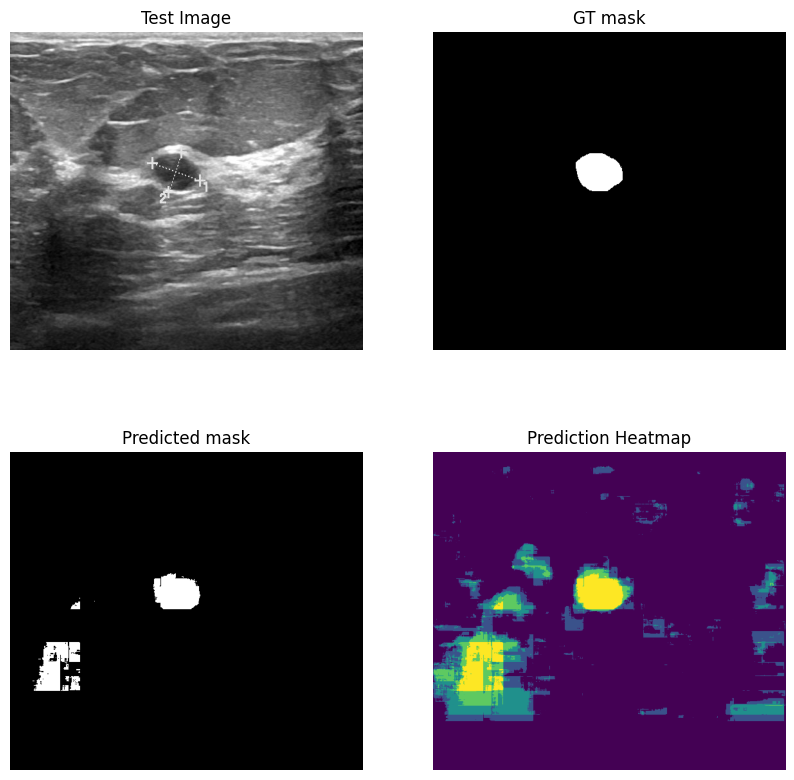

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[1][0].imshow(preds, cmap="gray")
axes[1][0].set_title("Predicted mask")
axes[1][0].axis("off")

im = axes[1][1].imshow(heatmap, cmap='viridis')
axes[1][1].set_title('Prediction Heatmap')
axes[1][1].axis("off")

mask = load_image(mask_path)
axes[0][1].set_title("GT mask")
axes[0][1].imshow(mask, cmap="gray")
axes[0][1].axis("off")

mask = load_image(image_path)
axes[0][0].set_title("Test Image")
axes[0][0].imshow(mask, cmap="gray")
axes[0][0].axis("off")

plt.show()

In [79]:
calculate_iou(preds, np.array(mask))

np.float64(0.03335461761961076)